Label Mapping: {'Uterine Carcinosarcoma/Uterine Malignant Mixed Mullerian Tumor': 0, 'Uterine Clear Cell Carcinoma': 1, 'Uterine Endometrioid Carcinoma': 2, 'Uterine Mixed Endometrial Carcinoma': 3, 'Uterine Serous Carcinoma/Uterine Papillary Serous Carcinoma': 4, 'Uterine Undifferentiated Carcinoma': 5}

SVM AUROC (multi-class): 0.54
Logistic Regression AUROC (multi-class): 0.67
Random Forest AUROC (multi-class): 0.50

SVM Accuracy: 0.54
Logistic Regression Accuracy: 0.54
Random Forest Accuracy: 0.36

SVM Classification Report:
                                                                 precision    recall  f1-score   support

Uterine Carcinosarcoma/Uterine Malignant Mixed Mullerian Tumor       0.50      0.14      0.22         7
                                  Uterine Clear Cell Carcinoma       0.00      0.00      0.00         3
                                Uterine Endometrioid Carcinoma       0.92      0.69      0.79        16
                           Uterine Mixed Endome

/Users/tomasmanea/anaconda3/envs/qbio_401/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/tomasmanea/anaconda3/envs/qbio_401/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tomasmanea/anaconda3/envs/qbio_401/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} 

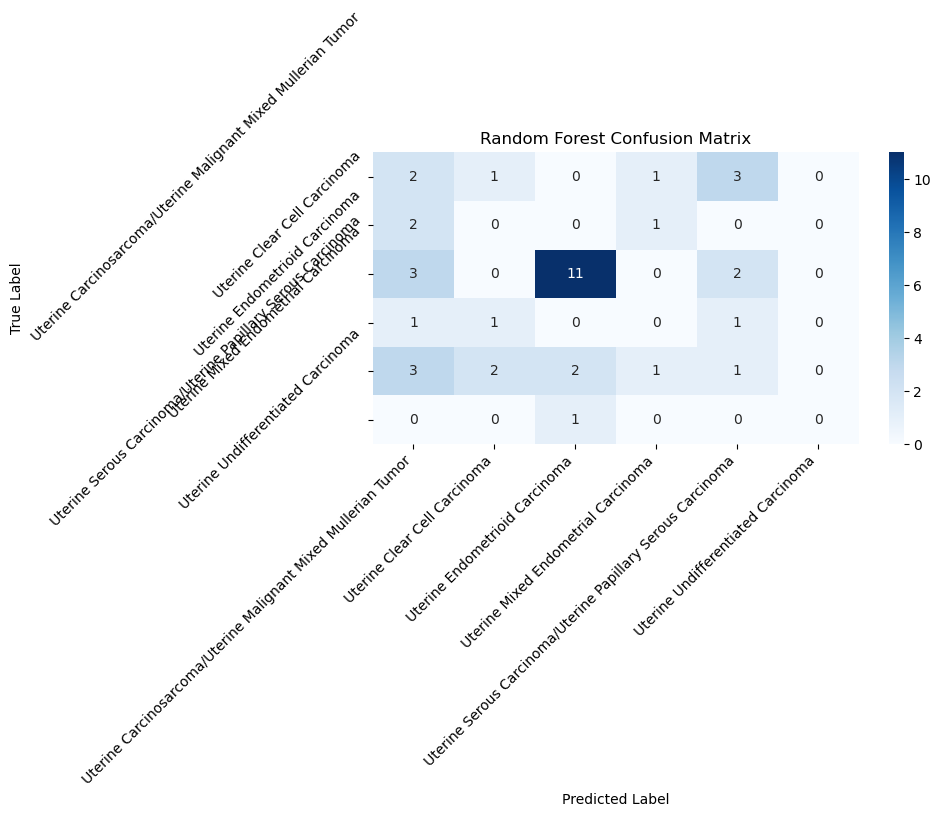

/var/folders/hp/p8lrjqpd7v35j_mgh8f2h_gc0000gn/T/ipykernel_32272/1078711121.py:114: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


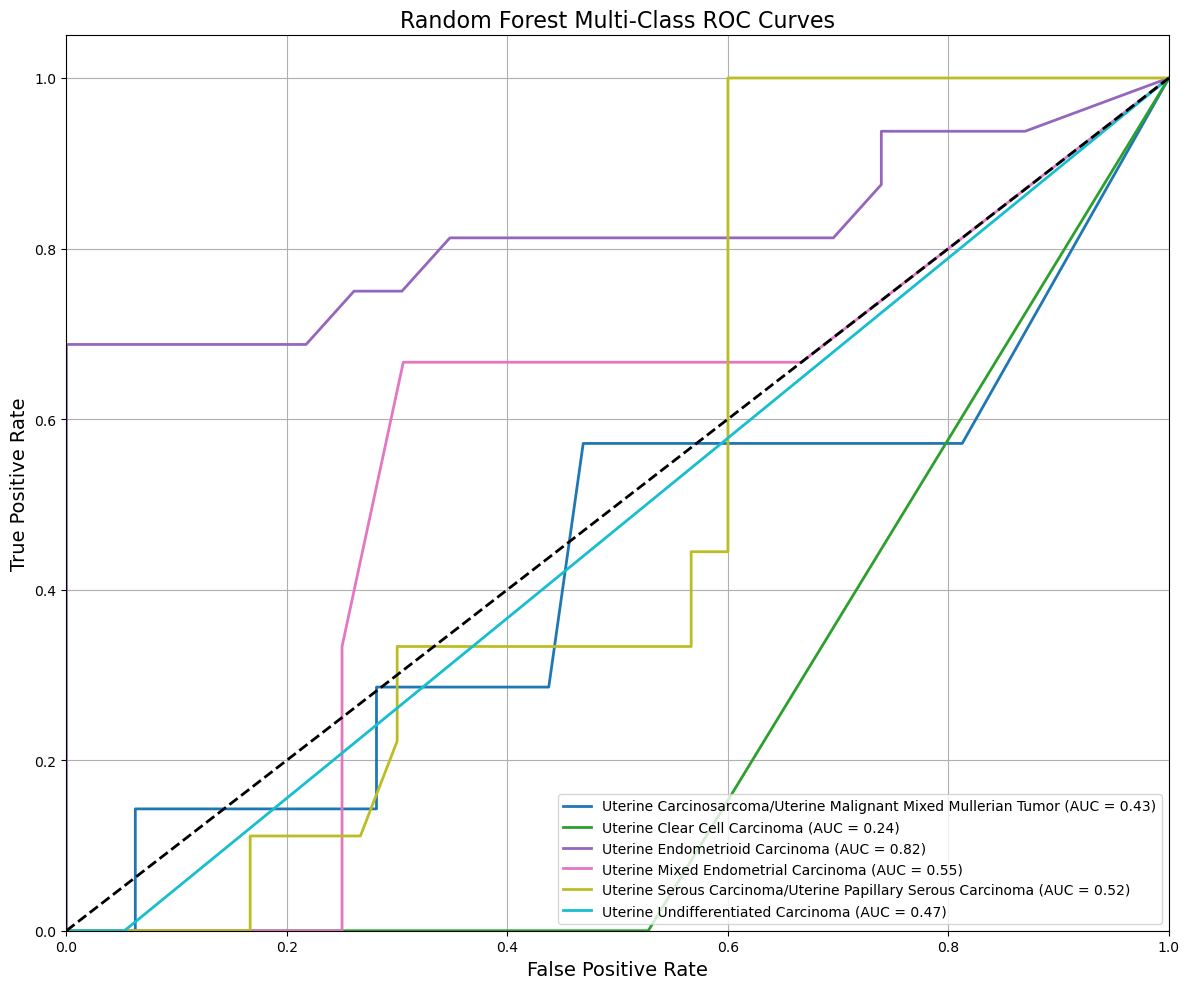

/var/folders/hp/p8lrjqpd7v35j_mgh8f2h_gc0000gn/T/ipykernel_32272/1078711121.py:139: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


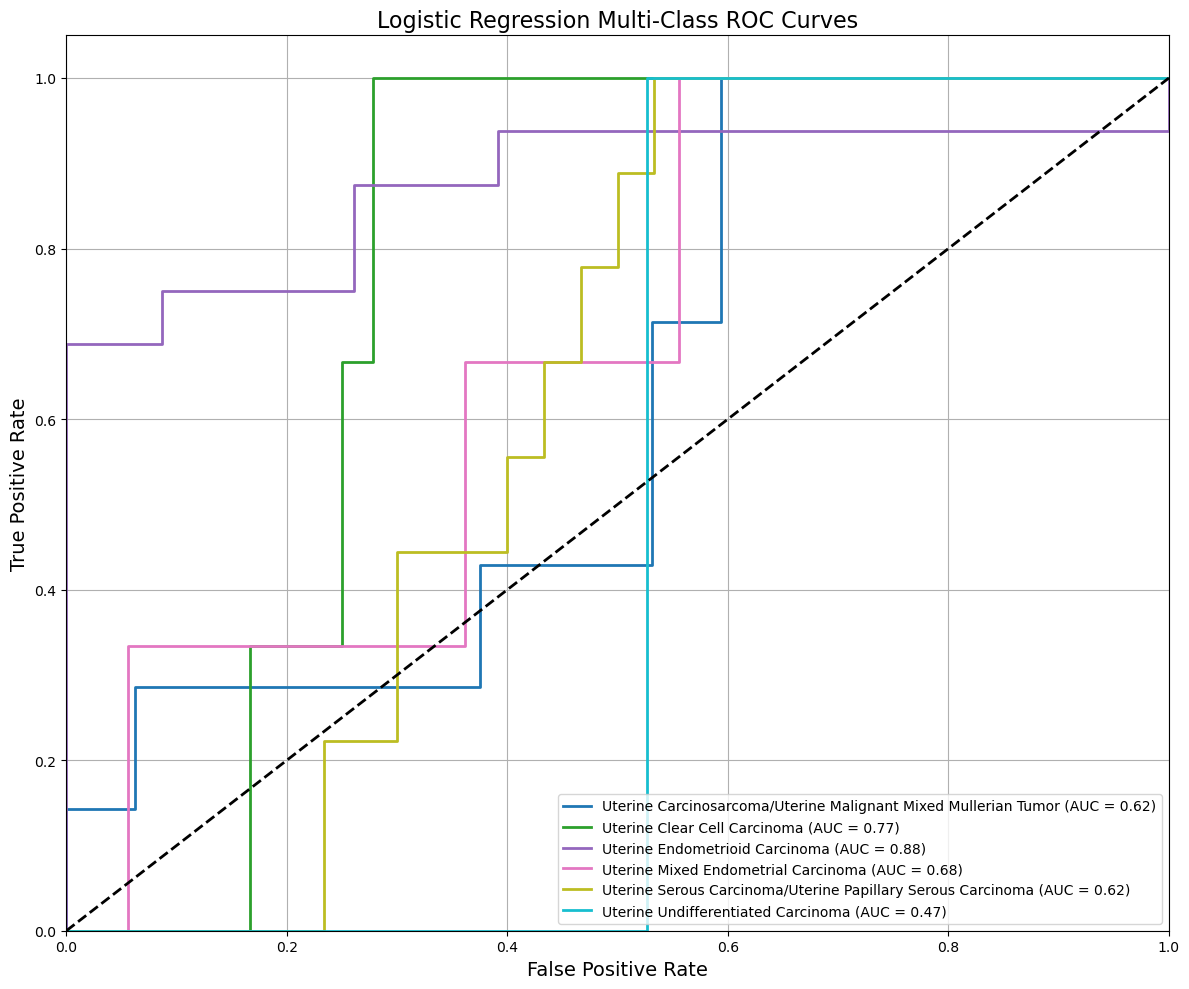

/var/folders/hp/p8lrjqpd7v35j_mgh8f2h_gc0000gn/T/ipykernel_32272/1078711121.py:164: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


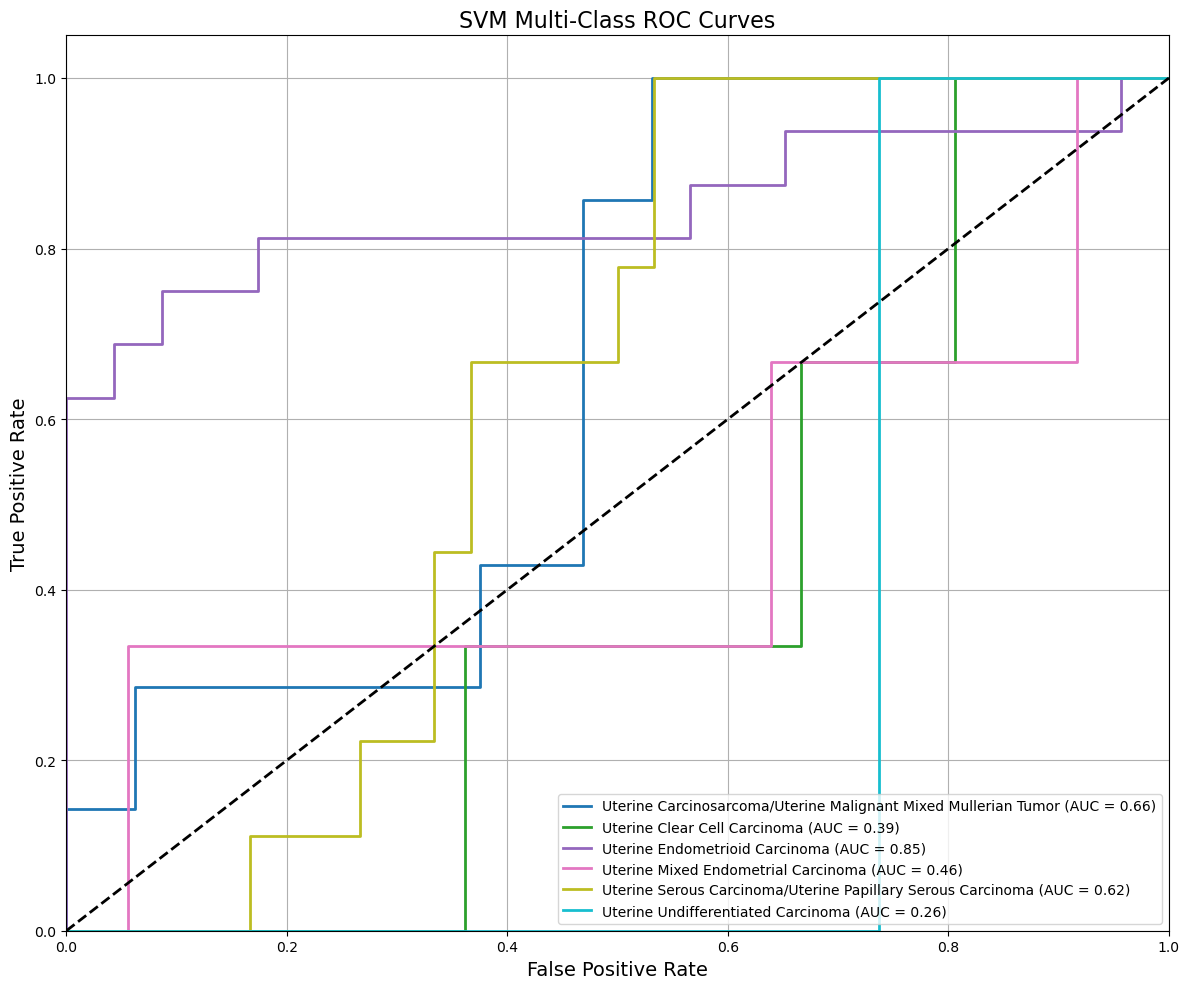

In [7]:
## MSK-Impact dataset 
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
)

# Load the MSK-IMPACT data
file_path = "data/msk-impact/ucec_msk_2018_clinical_data.tsv"  
df = pd.read_csv(file_path, sep='\t')

# Preprocessing & Feature Engineering
df_mutations = df[['Patient ID', 'Cancer Type Detailed', 'Mutation Count', 'TMB (nonsynonymous)', 'Fraction Genome Altered', 'Neoplasm Histologic Grade']]
df_mutations = df_mutations.dropna()

# Remove classes with fewer than 2 samples
class_counts = df_mutations['Cancer Type Detailed'].value_counts()
valid_classes = class_counts[class_counts >= 2].index
df_mutations = df_mutations[df_mutations['Cancer Type Detailed'].isin(valid_classes)]

# Label encode all cancer types
le = LabelEncoder()
df_mutations['Cancer Type'] = le.fit_transform(df_mutations['Cancer Type Detailed'])
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)

# Features and target
X = df_mutations[['Mutation Count', 'TMB (nonsynonymous)', 'Fraction Genome Altered', 'Neoplasm Histologic Grade']]
y = df_mutations['Cancer Type']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train models
svm_model = SVC(kernel='rbf', probability=True, decision_function_shape='ovr', random_state=42)
svm_model.fit(X_train, y_train)

logreg_model = LogisticRegression(max_iter=1000, random_state=42, multi_class='ovr')
logreg_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict class labels
y_pred_svm = svm_model.predict(X_test)
y_pred_logreg = logreg_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Predict probabilities
y_pred_prob_svm = svm_model.predict_proba(X_test)
y_pred_prob_logreg = logreg_model.predict_proba(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)

# Multi-class AUROC calculation (One-vs-Rest)
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)

# If only 2 classes, binarizer returns 1D, so fix it
if y_test_binarized.shape[1] == 1:
    y_test_binarized = np.hstack((1 - y_test_binarized, y_test_binarized))

auc_svm = roc_auc_score(y_test_binarized, y_pred_prob_svm, multi_class='ovr')
auc_logreg = roc_auc_score(y_test_binarized, y_pred_prob_logreg, multi_class='ovr')
auc_rf = roc_auc_score(y_test_binarized, y_pred_prob_rf, multi_class='ovr')

print(f"\nSVM AUROC (multi-class): {auc_svm:.2f}")
print(f"Logistic Regression AUROC (multi-class): {auc_logreg:.2f}")
print(f"Random Forest AUROC (multi-class): {auc_rf:.2f}")

# Accuracy scores
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_logreg = accuracy_score(y_test, y_pred_logreg)
acc_rf = accuracy_score(y_test, y_pred_rf)

print(f"\nSVM Accuracy: {acc_svm:.2f}")
print(f"Logistic Regression Accuracy: {acc_logreg:.2f}")
print(f"Random Forest Accuracy: {acc_rf:.2f}")

# Classification reports
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm, target_names=le.classes_))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg, target_names=le.classes_))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=le.classes_))

# --- Confusion Matrix Heatmap for Random Forest  ---
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.tight_layout()
plt.savefig('rf_confusion_matrix_heatmap.png', dpi=300)
plt.show()

# Random Forest ROC Curves
n_classes = len(le.classes_)
plt.figure(figsize=(12, 10))
colors = plt.cm.get_cmap('tab10', n_classes)

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob_rf[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors(i), lw=2,
             label=f'{le.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Random Forest Multi-Class ROC Curves', fontsize=16)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig('rf_multiclass_roc_curves.png', dpi=300)
plt.show()

#  Logistic Regression ROC Curves
n_classes = len(le.classes_)
plt.figure(figsize=(12, 10))
colors = plt.cm.get_cmap('tab10', n_classes)

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob_logreg[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors(i), lw=2,
             label=f'{le.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Logistic Regression Multi-Class ROC Curves', fontsize=16)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig('logreg_multiclass_roc_curves.png', dpi=300)
plt.show()

# SVM ROC Curves
n_classes = len(le.classes_)
plt.figure(figsize=(12, 10))
colors = plt.cm.get_cmap('tab10', n_classes)

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob_svm[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors(i), lw=2,
             label=f'{le.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('SVM Multi-Class ROC Curves', fontsize=16)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig('svm_multiclass_roc_curves.png', dpi=300)
plt.show()


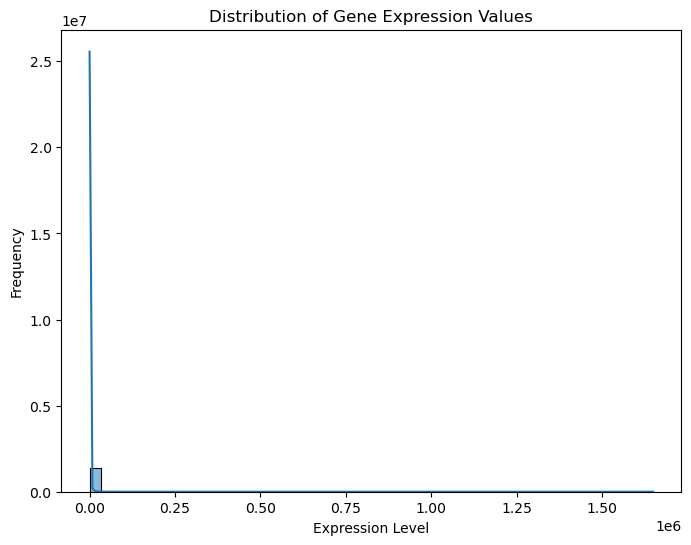

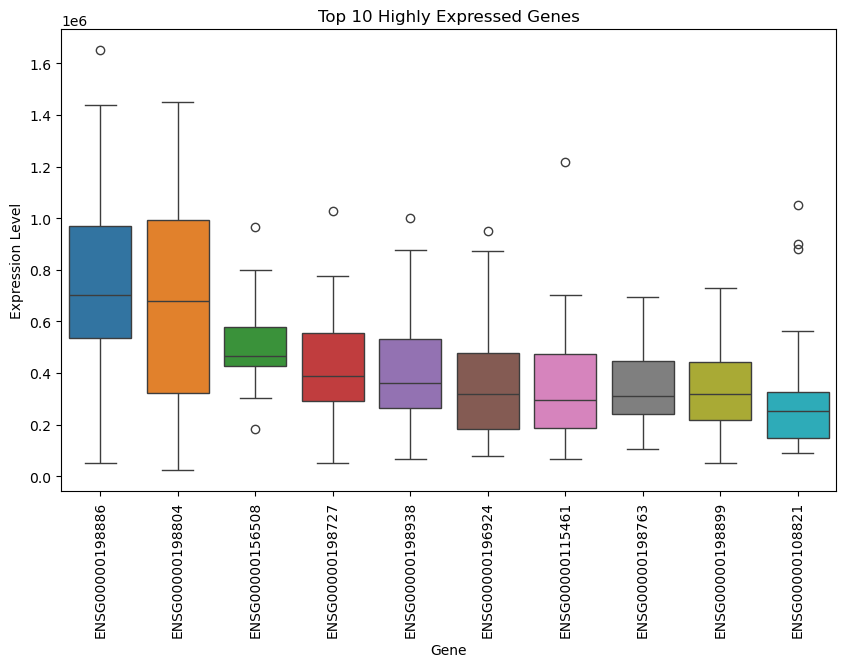

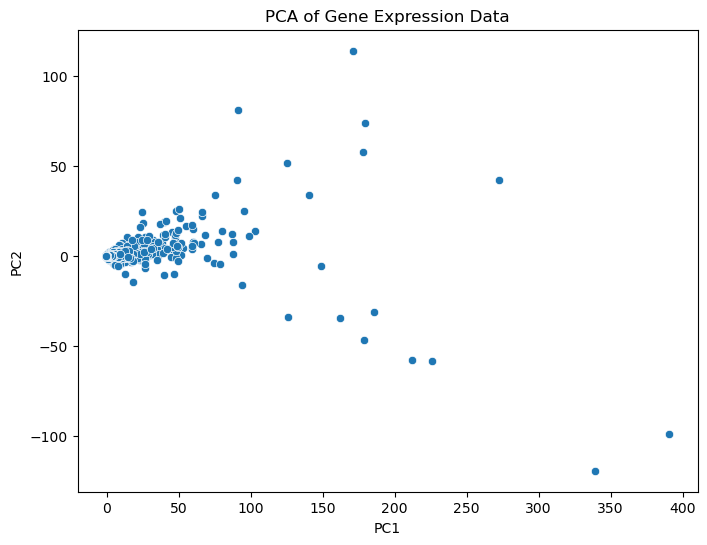

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Top 10 Highly Expressed Genes:
ND4 - NADH dehydrogenase subunit 4
COX1 - cytochrome c oxidase subunit I
EEF1A1 - eukaryotic translation elongation factor 1 alpha 1
CYTB - cytochrome b
COX3 - cytochrome c oxidase subunit III
FLNA - filamin A
IGFBP5 - insulin like growth factor binding protein 5
ND2 - NADH dehydrogenase subunit 2
ATP6 - ATP synthase F0 subunit 6
COL1A1 - collagen type I alpha 1 chain


In [17]:
## GTEx Dataset 
# Import Packages
import mygene
from sklearn.decomposition import PCA
from gprofiler import GProfiler

# Load the dataset
file_path = "data/GTEx/gene_reads_cervix_endocervix.gct"  
df = pd.read_csv(file_path, sep='\t', skiprows=2)  # Skipping metadata rows

# Display basic info
#print(df_gtex.head())
#print(df_gtex.shape)  

# Data Cleaning
df['Name'] = df['Name'].str.split('.').str[0]  # Remove Ensembl version numbers
df = df.drop(columns=['Description'])  # Drop the Description column

# Set Gene column as index
df.set_index('Name', inplace=True)

# Check for missing values
df = df.dropna()

# Summary Statistics
#summary_stats = df.describe().transpose()
#print(summary_stats)

# Histogram of expression values
plt.figure(figsize=(8, 6))
sns.histplot(df.values.flatten(), bins=50, kde=True)
plt.xlabel('Expression Level')
plt.ylabel('Frequency')
plt.title('Distribution of Gene Expression Values')
plt.show()

# Log Transform (if needed)
df_log = np.log1p(df)  # log(1 + x) transformation

# Boxplot of top 10 highly expressed genes
top_genes = df.mean(axis=1).nlargest(10).index
df_top = df.loc[top_genes].transpose()
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_top)
plt.xticks(rotation=90)
plt.xlabel('Gene')
plt.ylabel('Expression Level')
plt.title('Top 10 Highly Expressed Genes')
plt.savefig("top10_genes_boxplot.png", dpi=300, bbox_inches='tight')
plt.show()

# PCA Analysis
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Scatter plot of first two PCs
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Gene Expression Data')
plt.savefig("pca_scatterplot.png", dpi=300, bbox_inches='tight')
plt.show()

# Assume top_genes is your list of Ensembl IDs
top_genes_list = top_genes.tolist()

# Initialize mygene
mg = mygene.MyGeneInfo()

# Query gene symbols and names
gene_info = mg.querymany(top_genes_list, scopes='ensembl.gene', fields='symbol,name', species='human')

# Print gene symbol and full name
print("Top 10 Highly Expressed Genes:")
symbols = []
names = []

for g in gene_info:
    symbol = g.get('symbol', 'N/A')
    name = g.get('name', 'N/A')
    print(f"{symbol} - {name}")
    symbols.append(symbol)
    names.append(name)

# Now create the table
gene_table = pd.DataFrame({'Symbol': symbols, 'Name': names})

# Save to CSV
gene_table.to_csv("top_10_highly_expressed_genes.csv", index=False)


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 25, 4)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_16 (Conv1D)              │ (None, 25, 32)         │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 13, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_17 (Conv1D)              │ (None, 13, 16)         │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_5 (UpSampling1D)  │ (None, 26, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_18 (Conv1D)              │ (None, 26, 4)          │           196 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cropping1d_3 (Cropping1D)       │ (None, 25, 4)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,164 (8.45 KB)

 Trainable params: 2,164 (8.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4302/4302 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0339 - val_loss: 9.1822e-05
Epoch 2/10
4302/4302 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 6.1008e-05 - val_loss: 1.7330e-05
Epoch 3/10
4302/4302 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 1.6486e-05 - val_loss: 9.2619e-06
Epoch 4/10
4302/4302 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1.3113e-05 - val_loss: 7.0580e-06
Epoch 5/10
4302/4302 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 9.9854e-06 - val_loss: 9.3391e-06
Epoch 6/10
4302/4302 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 8.9468e-06 - val_loss: 8.4776e-06
Epoch 7/10
4302/4302 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 9.7109e-06 - val_loss: 6.8651e-06
Epoch 8/10
4302/4302 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 9.3471e-06 - val_loss: 1.2173e-05
Epoch 9/10
4302/4302 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 9.4729e-06 - val_loss: 5.6200e-06
Epoch 10/10
4302/4302 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 7.5400e-06 - val_loss: 5.3500e-06
4302/4302 ━━━━━━━━━━━━━━━━━━━━ 2s 376us/s

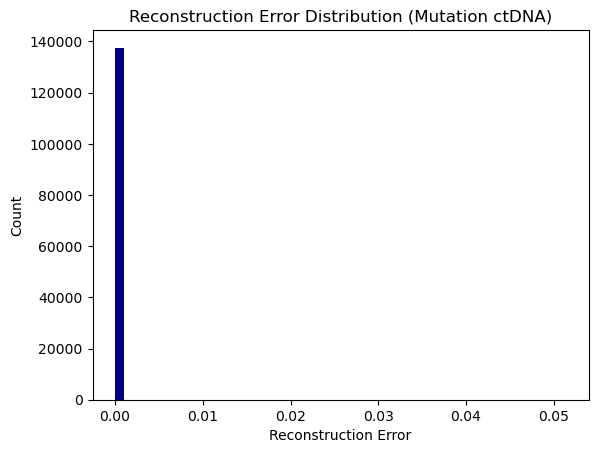

In [24]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, UpSampling1D, Cropping1D, Flatten, Dense, Dropout, LSTM, Input, RepeatVector, TimeDistributed
from Bio import SeqIO
import tensorflow as tf

# Read FASTA sequences
def read_fasta(file_path):
    sequences = []
    for record in SeqIO.parse(file_path, "fasta"):
        sequences.append(str(record.seq))
    return sequences

# One-hot encode sequences
def one_hot_encode(sequences, max_seq_length=None):
    nucleotide_dict = {'A': 0, 'C': 1, 'G': 2, 'T': 3}
    one_hot_sequences = []
    
    for seq in sequences:
        one_hot_seq = np.zeros((len(seq), 4))  
        for i, nucleotide in enumerate(seq):
            if nucleotide in nucleotide_dict:
                one_hot_seq[i, nucleotide_dict[nucleotide]] = 1
        one_hot_sequences.append(one_hot_seq)
    
    if max_seq_length is None:
        max_seq_length = max([len(seq) for seq in sequences])
    
    padded_sequences = []
    for seq in one_hot_sequences:
        if len(seq) > max_seq_length:
            padded_sequences.append(seq[:max_seq_length])
        else:
            padded_sequences.append(np.pad(seq, ((0, max_seq_length - len(seq)), (0, 0)), 'constant'))
    
    return np.array(padded_sequences), max_seq_length

# Build CNN-LSTM Autoencoder
def build_autoencoder_model(max_seq_length):
    input_layer = Input(shape=(max_seq_length, 4))

    # Encoder
    x = Conv1D(32, 3, activation='relu', padding='same')(input_layer)
    x = MaxPooling1D(2, padding='same')(x)
    
    # Bottleneck
    x = Conv1D(16, 3, activation='relu', padding='same')(x)
    
    # Decoder
    x = UpSampling1D(2)(x)
    x = Conv1D(4, 3, activation='sigmoid', padding='same')(x)
    x = Cropping1D(cropping=(0, 1))(x)  # remove 1 timestep at the end
    
    autoencoder = Model(input_layer, x)
    autoencoder.compile(optimizer='adam', loss='mse')
    
    return autoencoder

# Load ctDNA data
ctDNA_1 = read_fasta("data/PRJDB14089/DRR396252.fasta")
ctDNA_2 = read_fasta("data/PRJDB14089/DRR396253.fasta")
ctDNA_sequences = ctDNA_1 + ctDNA_2

# Preprocess
max_seq_length = 25
X_data, _ = one_hot_encode(ctDNA_sequences, max_seq_length)

# Train/Test split
X_train, X_test = train_test_split(X_data, test_size=0.2, random_state=42)

# Build and train the model
autoencoder = build_autoencoder_model(max_seq_length)
autoencoder.summary()

history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=128, validation_data=(X_test, X_test))

# Evaluate reconstruction errors
X_test_pred = autoencoder.predict(X_test)
reconstruction_errors = np.mean((X_test_pred - X_test)**2, axis=(1, 2))

# Visualize reconstruction errors
plt.hist(reconstruction_errors, bins=50, color='navy')
plt.xlabel('Reconstruction Error')
plt.ylabel('Count')
plt.title('Reconstruction Error Distribution (Mutation ctDNA)')
plt.savefig('reconstruction_error_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
